# 🎲 Introducción a la Simulación

Una **simulación** es un proceso en el que usamos un computador para imitar fenómenos reales o aleatorios. Esto nos permite analizar situaciones repetitivas o inciertas sin realizar experimentos físicos.

Aquí te presentamos una guía básica para construir simulaciones en Python.

---

## 🧭 Pasos para realizar una simulación

- 1. ¿Qué queremos simular?

Primero define claramente el experimento.  
Por ejemplo: *¿Qué sucede al lanzar una moneda?* Los posibles resultados serían `'cara'` o `'sello'`.

- 2. ¿Cómo simular un solo valor?

Diseña una forma de generar **un resultado aleatorio**.  
Por ejemplo, para una moneda:
```python
np.random.choice(['cara', 'sello'])
```

- 3. ¿Cuántas veces repetiremos el experimento?

Decide cuántas veces ejecutarás la simulación.

Por ejemplo: *simular 1000 lanzamientos de moneda* te permitirá observar con mayor claridad la frecuencia relativa de cada resultado (`'cara'` o `'sello'`).



4. ¿Cómo simular múltiples valores y almacenarlos?
Sigue estos pasos:

- Crea una lista vacía para almacenar los resultados.
- Usa un bucle for para repetir la simulación la cantidad de veces que necesites.

- En cada repetición:
    Simula un valor aleatorio.
    Guarda el valor en la lista.

5. ¿Cómo analizar los resultados?
Una vez tengas los resultados:

-  Crea una tabla con Table().with_column('Resultado', resultados)
- Agrupa por resultado con .group('Resultado') para contar frecuencias
- Visualiza los resultados con .bar('Resultado') para ver la distribución
- Calcula proporciones u otros estadísticos según el caso

Referencia: https://inferentialthinking.com/chapters/09/3/Simulation.html#

In [42]:
import numpy as np
from datascience import *
import matplotlib.pylab as plots
plots.style.use('fivethirtyeight')
%matplotlib inline


In [43]:
moneda = make_array("tail", "head")
moneda

array(['tail', 'head'],
      dtype='<U4')

In [44]:
def simulacion_lanzamiento():
    lanzamientos =  np.random.choice(moneda, 100)
    return np.count_nonzero(lanzamientos=="head")
    return np.random.choice(moneda)

In [48]:
lanzamientos=make_array()
for i in range(0, 100):
    lanzamientos = np.append(lanzamientos,simulacion_lanzamiento()    )

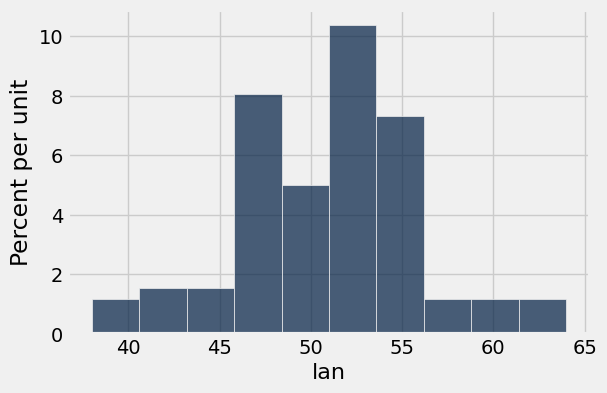

In [49]:
mon = Table().with_columns("lan",lanzamientos)

mon.hist()

# Problema The monty hall 


<img src="Fig0.png" alt="Descripción de la imagen" style="width: 500px;"/>

El problema de Monty Hall es un clásico de la teoría de probabilidades y es famoso por ilustrar cómo la intuición humana a menudo puede llevar a conclusiones incorrectas acerca de las probabilidades. Está basado en un programa de concursos televisivo llamado "Let’s Make a Deal", que fue presentado por Monty Hall. A continuación se presenta una introducción guía al problema:

### Descripción del Problema:

Imagina que participas en un concurso donde se te presenta una elección entre tres puertas. Detrás de una de estas puertas hay un premio muy deseado, como un coche, y detrás de las otras dos puertas hay un premio indeseado, como una cabra.

**Pasos del Concurso:**
1. **Elección Inicial:** Primero, se te pide que elijas una de las tres puertas.
2. **Apertura del Presentador:** Luego de que elijas una puerta, el anfitrión (quien sabe lo que hay detrás de todas las puertas) abrirá una de las otras dos puertas, revelando una cabra.
3. **Segunda Elección:** Ahora tienes la opción de quedarte con tu elección inicial o cambiar a la otra puerta restante.

### La Cuestión:

La pregunta fundamental que plantea el problema es: ¿Deberías cambiar tu elección o quedarte con tu elección inicial para maximizar tus posibilidades de ganar el coche?

In [50]:
from IPython.display import YouTubeVideo
from datascience import *
import numpy as np
import matplotlib.pylab as plots
plots.style.use('fivethirtyeight')
%matplotlib inline


In [ ]:
# Minuto  1:20
YouTubeVideo("https://www.youtube.com/watch?v=uz58hg0EJAY")

In [68]:
games = Table(['Adivinar', 'Revelada', 'OtraOpcion'])


for i in range(0, 1000):
    puertas = make_array("Cabra A", "Cabra B", "Carro")
    eleccion = np.random.choice(puertas)
    
    if eleccion=="Cabra A":
        revelada = "Cabra B"
        otra = "Carro"
    elif eleccion=="Cabra B":
        revelada="Cabra A"
        otra="Carro"
    elif eleccion=="Carro":
        revelada = np.random.choice(make_array("Cabra A", "Cabra B"))
        if(revelada=="Cabra A"):
            otra="Cabra B"
        elif(revelada=="Cabra B"):
            otra="Cabra A"
    games.append([eleccion, revelada, otra])

In [69]:
a = games.group("Adivinar")

In [70]:
oo = games.group("OtraOpcion")

In [71]:
a

Adivinar,count
Cabra A,308
Cabra B,361
Carro,331


In [72]:
a.join("Adivinar", )

OtraOpcion,count
Cabra A,168
Cabra B,163
Carro,669


In [ ]:
import random

# Puertas y opciones
puertas = ["Cabra A", "Cabra B", "Carro"]

# Repetir el juego muchas veces
resultados = []
for i in range(10):  # probar con 10 al inicio
    random.shuffle(puertas)
    eleccion = random.choice(puertas)
    
    if eleccion == "Cabra A":
        revelada = "Cabra B"
        otra = "Carro"
    elif eleccion == "Cabra B":
        revelada = "Cabra A"
        otra = "Carro"
    else:
        revelada = random.choice(["Cabra A", "Cabra B"])
        
        if revelada == "Cabra B" 
            otra = "Cabra A" 
        else "Cabra B"
            otra = "Cabra B" 
    
    resultados.append([eleccion, revelada, otra])

print(resultados)
